In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of emotion categories
emotions = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]

# List of gender-intensity combinations
gender = ["female", "male"]

# List of gender-intensity combinations
intensity = ["normal", "intense"]

# List of categories including mean
categories = ["Comprehensibility", "Emotion precision", "Disturbing artifacts", "Naturalness", "General speech quality", "Category Mean"]

# Read CSV files into DataFrames
mean_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Means.csv", thousands='.', decimal=',')
std_dev_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Standard Deviation.csv", thousands='.', decimal=',')
min_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Min.csv", thousands='.', decimal=',')
max_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Max.csv", thousands='.', decimal=',')

# Combine all DataFrames into one
all_data = {"Mean": mean_df, "Std Dev": std_dev_df, "Min": min_df, "Max": max_df}
metrics = all_data.keys()

# Drop the column "Unnamed: 6" from each DataFrame
for key in all_data.keys():
    if 'Unnamed: 6' in all_data[key].columns:
        all_data[key].drop('Unnamed: 6', axis=1, inplace=True)

# Keep only rows up to and including index 30
for key in all_data.keys():
    all_data[key] = all_data[key].iloc[:31, :]

In [128]:
%matplotlib inline
#mean_df # This DataFrame contains the mean values for each category, but still spam

In [129]:
index = pd.MultiIndex.from_product([emotions, gender, intensity], names=['Emotion', 'Gender', 'Intensity'])
columns = pd.MultiIndex.from_product([categories, metrics], names=['Category', 'Metric'])

result_df = pd.DataFrame(index=index, columns=columns)

result_df.drop(index=[('basic_tts', 'female', 'normal')], inplace=True)
result_df.drop(index=[('basic_tts', 'male', 'intense')], inplace=True)
result_df.drop(index=[('basic_tts', 'female', 'intense')], inplace=True)

result_df.drop(index=[('neutral', 'female', 'intense')], inplace=True)
result_df.drop(index=[('neutral', 'male', 'intense')], inplace=True)

In [130]:
# result_df # This DataFrame is empty, but has the correct structure

In [131]:
#print(result_df.info())
#print(result_df.index)

#print(all_data["Mean"].info())
#print(all_data["Mean"].index)

#result_df.index

In [132]:
# Fill the result DataFrame with the values from the original DataFrames
for metric in metrics:
    for category in categories:
        for emotion in emotions:
            for g in gender:
                for i in intensity:
                    filename_part = "" if i == "normal" else "_strongIntensity"
                    substring_to_find = f"{emotion}{filename_part}__{g}.wav"
                    if emotion == "basic_tts":
                        substring_to_find = "basicTTS.wav"
                        if i == "intense":
                            continue
                        if g == "female":
                            continue
                    if emotion == "fearful" and i == "normal":
                        substring_to_find = f"{emotion}{filename_part}_{g}.wav"
                    filtered_rows = all_data[metric][all_data[metric]['Filename'].str.contains(substring_to_find)]
                    if not filtered_rows.empty:
                        result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]


In [133]:
result_df

Category                   Comprehensibility                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             3.923077  1.187542  1.0  5.0   
                 intense            4.230769  0.926809  2.0  5.0   
          male   normal             4.615385   0.50637  4.0  5.0   
                 intense            4.384615  0.767948  3.0  5.0   
basic_tts male   normal             2.384615  1.502135  1.0  5.0   
calm      female normal             3.923077  1.037749  2.0  5.0   
                 intense            4.307692  1.031553  2.0  5.0   
          male   normal                  2.0       1.0  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
disgust   female normal                  4.0  0.912871  2.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
          male   normal             2.461538  0.967418  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
fearful   female normal             4.461538   0.77625  3.0  5.0   
                 intense            4.307692  0.947331  2.0  5.0   
          male   normal             2.538462  1.330124  1.0  5.0   
                 intense            3.769231  1.165751  1.0  5.0   
happy     female normal             4.307692  0.947331  2.0  5.0   
                 intense            4.076923  1.115164  1.0  5.0   
          male   normal             1.692308    1.1094  0.0  4.0   
                 intense            4.307692  0.947331  2.0  5.0   
neutral   female normal             4.615385   0.50637  4.0  5.0   
          male   normal             2.153846  1.068188  0.0  4.0   
sad       female normal             4.153846  0.987096  2.0  5.0   
                 intense            4.615385  0.767948  3.0  5.0   
          male   normal             4.461538   0.77625  3.0  5.0   
                 intense            4.230769  1.165751  2.0  5.0   
surprised female normal             4.153846  1.068188  2.0  5.0   
                 intense            2.538462  1.265924  0.0  5.0   
          male   normal             4.230769  1.012739  2.0  5.0   
                 intense            4.153846  0.987096  2.0  5.0   

Category                   Emotion precision                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             1.538462  1.506397  0.0  4.0   
                 intense            4.230769  0.599145  3.0  5.0   
          male   normal             3.538462  1.198289  1.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
basic_tts male   normal             1.153846  1.214232  0.0  3.0   
calm      female normal             2.384615   1.38675  0.0  5.0   
                 intense            3.307692  1.493576  0.0  5.0   
          male   normal             1.384615   1.38675  0.0  5.0   
                 intense            1.769231  1.235168  0.0  4.0   
disgust   female normal             3.307692  1.493576  0.0  5.0   
                 intense            1.615385  1.325296  0.0  4.0   
          male   normal             0.846154  0.987096  0.0  3.0   
                 intense            2.615385  1.660244  0.0  5.0   
fearful   female normal             3.769231  1.786703  0.0  5.0   
                 intense                 4.0       1.0  2.0  5.0   
          male   normal             1.846154  1.463224  0.0  4.0   
                 intense            2.307692  1.652504  0.0  5.0   
happy     female normal             1.461538  1.391365  0.0  5.0   
                 intense            1.461538  1.450022  0.0  4.0   
          male   normal             0.923077  0.954074  0.0  3.0   
                 intense            1.307692  1.315587  0.0  4.0   
neutral   female normal             3.692308  1.377474 

In [173]:
# sns.catplot(data=result_df, kind="box", orient="h") # too broad

ValueError: Could not interpret value `Mean` for `y`. An entry with this name does not appear in `data`.

In [135]:
#result_df["Category Mean"]

In [136]:
mean_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Mean']
std_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Std Dev']
min_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Min']
max_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Max']
#std_df
#min_df
#max_df
#mean_df

In [137]:
# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([mean_df, std_df, min_df, max_df], keys=['Mean', 'Std Dev', 'Min', 'Max'], axis=1)
combined_df


Mean                    \
Category                   Comprehensibility Emotion precision   
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   

                                                             \
Category                   Disturbing artifacts Naturalness   
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 intense               3.615385    2.230769   
neutral   female normal                4.692308    3.846154   
          male   normal                0.692308    1.538462   
sad       female normal     

In [138]:
# Reset the index for better access to columns
reset_combined_df = combined_df.reset_index()
#combined_df
#reset_combined_df['Mean']
#reset_combined_df['Emotion']

In [139]:

# Specify the order of categories for better plotting
# order = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
order = ["fearful", "neutral", "sad", "angry", "calm", "surprised", "disgust", "neutral", "basic_tts"]

In [140]:
sns.set_theme(style="darkgrid")
sns.set_style("dark")

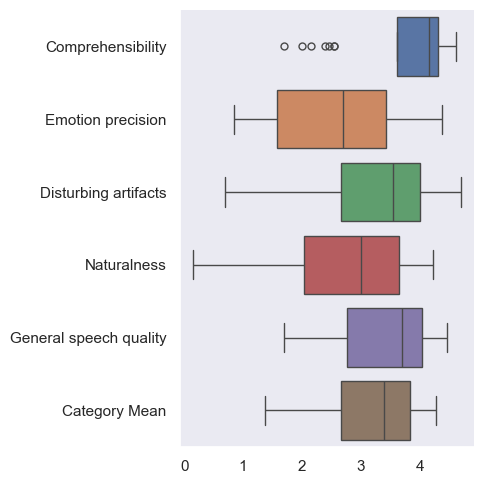

In [141]:
sns.catplot(data=combined_df['Mean'], kind="box", orient="h")

In [142]:
#hue_order = ["female", "male"]
#sns.boxplot(x=combined_df['Mean'], y=reset_combined_df['Emotion'], hue=reset_combined_df['Gender'], order=order, orient='h')
#plt.show()
#sns.boxplot(x=combined_df['Mean'], y=combined_df['Emotion'], order=order, orient='h')
#plt.show()

In [143]:
#result_df["Category Mean"]["Mean"].unstack(level=1).unstack(level=1).plot(kind="bar", figsize=(15, 10), title="Mean ratings for each emotion", ylabel="Mean rating", xlabel="Emotion", legend=True, rot=0)
#mean_df

In [144]:
# data from https://allisonhorst.github.io/palmerpenguins/
""" 
import matplotlib.pyplot as plt
import numpy as np

emotions_categories = order #("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(emotions_categories))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Emotion categories')
ax.set_xticks(x + width, emotions_categories)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show() """

basic_tts = result_df["Category Mean"]["Mean"]["basic_tts"]
basic_tts

Gender  Intensity
male    normal       1.369231
Name: Mean, dtype: object

In [ ]:
#result_df_reset = result_df.reset_index()
order
# Convert the 'Category' column to a Categorical type with the custom order
result_df['Emotion'] = pd.Categorical(result_df['Emotion'], categories=order, ordered=True)
# Sort the DataFrame based on the 'Category' column
sorted_df = result_df.sort_values(by='Emotion')
#sorted_df = result_df.sort_index()

In [172]:

category_mean_to_plot = result_df["Category Mean"]["Mean"].unstack(level=1).unstack(level=1)
category_mean_err_to_plot = result_df["Category Mean"]["Std Dev"].unstack(level=1).unstack(level=1)

category_mean_to_plot.plot.barh(figsize=(15, 10), 
                       title="Mean ratings for each emotion", 
                       ylabel="Mean rating", 
                       xlabel="Emotion", 
                       legend=True)


KeyError: 'Emotion'

<Axes: title={'center': 'Mean ratings for each emotion'}, xlabel='Emotion', ylabel='Mean rating'>

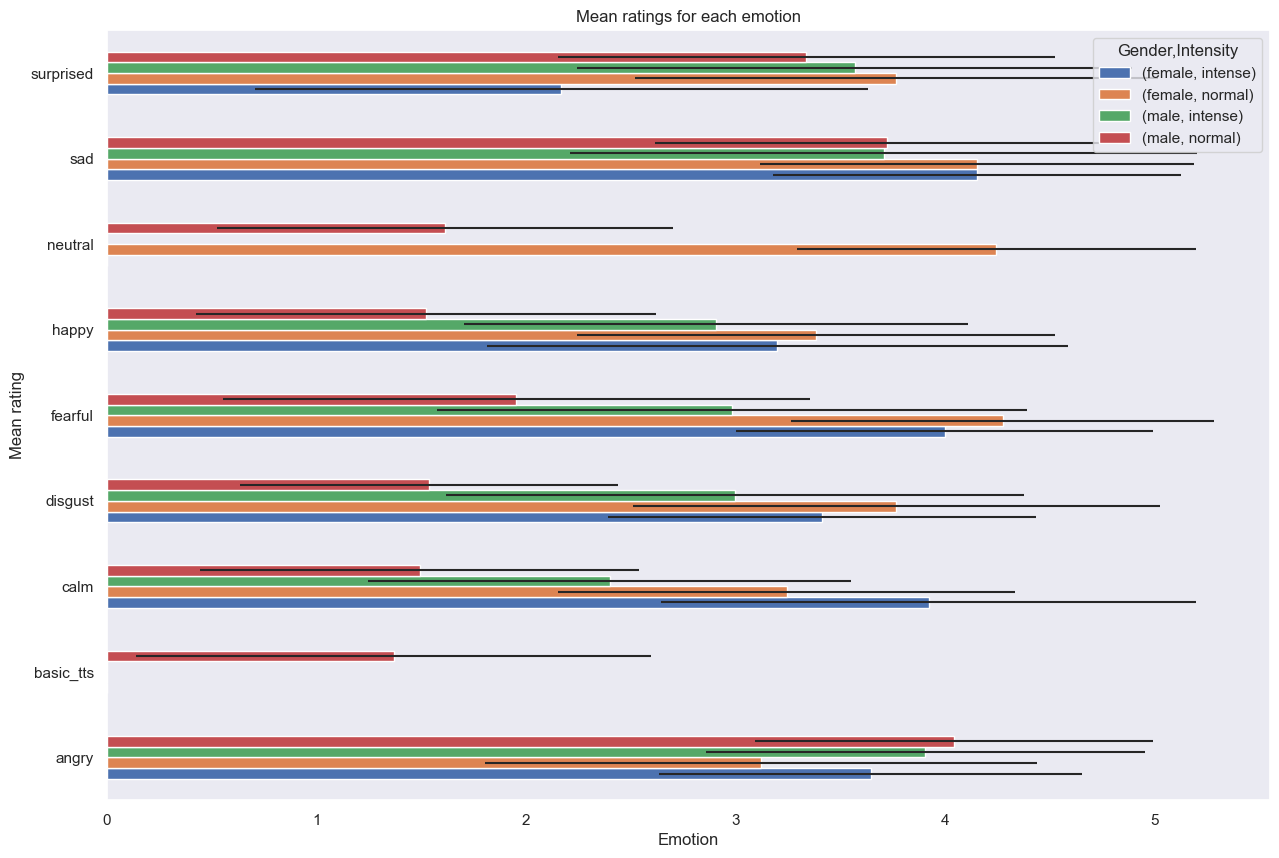

In [171]:
category_mean_to_plot.plot.barh(figsize=(15, 10), 
                       title="Mean ratings for each emotion", 
                       ylabel="Mean rating", 
                       xlabel="Emotion", 
                       xerr=category_mean_err_to_plot,
                       #colormap="Blues",
                       legend=True)

In [155]:
#result_df["Category Mean"].plot(kind="bar", figsize=(15, 10), title="Mean ratings for each emotion", ylabel="Mean rating", xlabel="Emotion", legend=True, rot=0)

In [169]:
result_df.plot.box(figsize=(15, 10), 
                       title="Mean ratings for each emotion", 
                       ylabel="Mean rating", 
                       xlabel="Emotion", 
                       column="Emotion", 
                       #by="gender",
                       #xerr=err_to_plot,
                       #colormap="Blues",
                       legend=True)

KeyError: "['Emotion'] not in index"